# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [3]:
# Your code here
data = pd.read_csv('../data/boston_data.csv')


In [4]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [5]:
# checking for missing values

null_cols = data.isnull().sum()
null_cols[null_cols > 0]

Series([], dtype: int64)

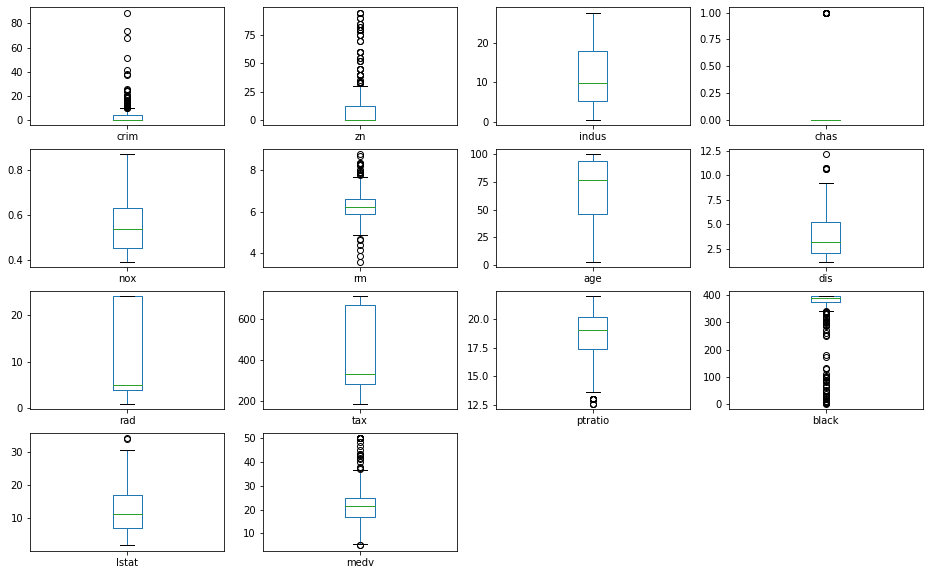

In [6]:
# checking for outliers

data.plot(kind='box', subplots=True, layout=(4,4), figsize=(16,10), sharex=False, sharey=False)
plt.show()

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

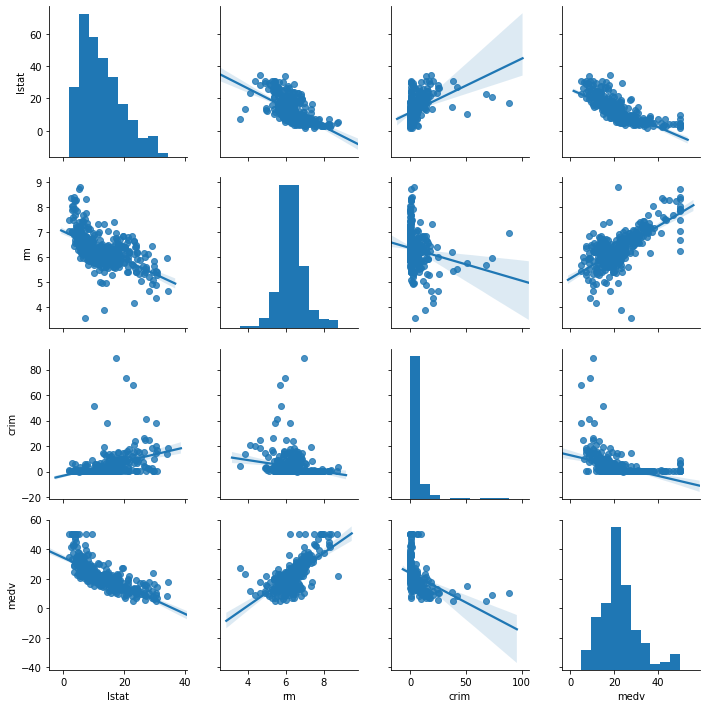

In [7]:
# Your plots here
data_correlation = data[['lstat', 'rm', 'crim','medv']]

sns.pairplot(data_correlation, kind="reg")

In [8]:
print("Correlation between medv and lstat:", data['medv'].corr(data['lstat']))
print("Correlation between medv and rm:", data['medv'].corr(data['rm']))
print("Correlation between medv and crim:", data['medv'].corr(data['crim']))

Correlation between medv and lstat: -0.7426954940642155
Correlation between medv and rm: 0.6835409939262139
Correlation between medv and crim: -0.4009558757372438


### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?


Strong correlation between the value of the houses and the lstat variable which makes sense because the higher the 'lower status' the lower will be the value of the house
Strong correlation between the value of the houses and the rm variable which makes sense because the higher the average number of rooms per dwelling, the higher will be the value of the house
Negative correlation between the value of the houses and the crim variable which makes sense because the higher the per capita crime rate by town, the lower will be the value of the house


### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

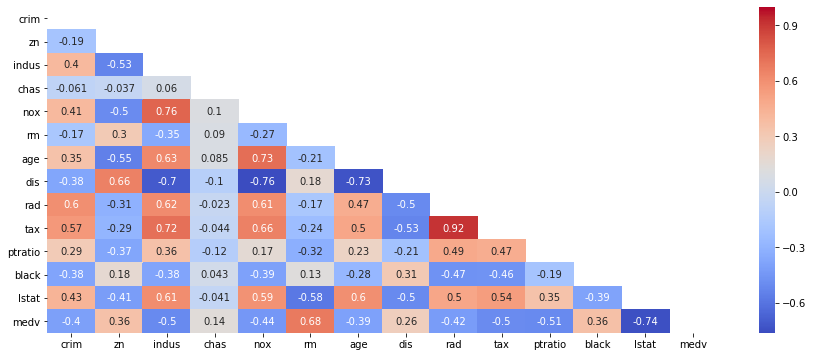

In [9]:
corr_matrix = data.corr()

plt.figure(figsize=(15,6))
mask = np.triu(corr_matrix)

heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", mask=mask)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

heatmap

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [35]:
# Your code here

# Your code here
data['medv'].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [36]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_pred)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [37]:
# Your code here
X = data.drop(columns='medv')
y = data['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [38]:
# Five separate RFR here with the given max depths
depths = [2, 4, 6, 8, 10]

# Make a decision tree and train
depths = [2, 4, 6, 8, 10]
train_results = []
test_results = []
for depth in depths:
    rf = RandomForestRegressor(n_estimators=100, max_depth=depth)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    score_train = r2_score(y_train, train_pred)
    train_results.append(score_train)
   
    y_pred = rf.predict(X_test)
    score_test = r2_score(y_test, y_pred)
    test_results.append(score_test)

Now, plot the score for each tree on the training set and on the testing set.

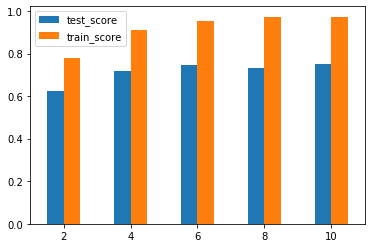

In [39]:
# Produce a plot with the score for the testing and training for the different max depths

df = pd.DataFrame({'test_score': test_results,
                   'train_score': train_results}, index=depths)
ax = df.plot.bar(rot=0)

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [40]:


# The depth seems to affect more the training score than the test score for depth >= 4, 
# which means that if we continue to increase the depth we might be overfitting the 
# model to the training data



### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here
# max_depth = 1, we are underfitting the model (high bias)
# max_depth = 10, we are overfitting the model (high variance)


### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here
# We get the best score when max_depth = 6

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here

